In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from datetime import datetime, timedelta
import sklearn.metrics as metrics
%matplotlib inline
plt.style.use('fivethirtyeight')

In [2]:
data=pd.read_csv("AAPL.csv")
data.set_index('Date', inplace=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-01,37.275002,37.555000,37.102501,37.512501,35.609295,141474400
2017-08-02,39.820000,39.937500,39.040001,39.285000,37.291874,279747200
2017-08-03,39.262501,39.302502,38.755001,38.892502,36.919292,108389200
2017-08-04,39.017502,39.349998,38.922501,39.097500,37.113876,82239600
2017-08-07,39.264999,39.730000,39.167500,39.702499,37.688194,87481200


In [4]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 2017-08-01 to 2021-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1113 non-null   float64
 1   High       1113 non-null   float64
 2   Low        1113 non-null   float64
 3   Close      1113 non-null   float64
 4   Adj Close  1113 non-null   float64
 5   Volume     1113 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 60.9+ KB


In [6]:
df1=data.reset_index()['High']

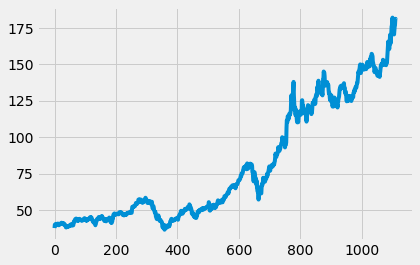

In [7]:
plt.plot(df1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
import numpy
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [11]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [14]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
import tensorflow as tf

Epoch 1/100
10/10 [==============================] - 26s 753ms/step - loss: 0.0072 - val_loss: 0.0942
Epoch 2/100
10/10 [==============================] - 4s 353ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 3/100
10/10 [==============================] - 4s 361ms/step - loss: 8.3617e-04 - val_loss: 0.0034
Epoch 4/100
10/10 [==============================] - 3s 326ms/step - loss: 6.1008e-04 - val_loss: 0.0027
Epoch 5/100
10/10 [==============================] - 3s 347ms/step - loss: 5.2568e-04 - val_loss: 0.0023
Epoch 6/100
10/10 [==============================] - 4s 359ms/step - loss: 4.8754e-04 - val_loss: 0.0018
Epoch 7/100
10/10 [==============================] - 3s 338ms/step - loss: 4.5479e-04 - val_loss: 0.0017
Epoch 8/100
10/10 [==============================] - 3s 350ms/step - loss: 4.4435e-04 - val_loss: 0.0018
Epoch 9/100
10/10 [==============================] - 3s 333ms/step - loss: 4.0385e-04 - val_loss: 0.0020
Epoch 10/100
10/10 [==============================] - 3s 326ms

10/10 [==============================] - 3s 262ms/step - loss: 1.3707e-04 - val_loss: 0.0032
Epoch 79/100
10/10 [==============================] - 3s 301ms/step - loss: 1.4583e-04 - val_loss: 0.0026
Epoch 80/100
10/10 [==============================] - 3s 336ms/step - loss: 1.3470e-04 - val_loss: 0.0045
Epoch 81/100
10/10 [==============================] - 3s 322ms/step - loss: 1.3691e-04 - val_loss: 0.0081
Epoch 82/100
10/10 [==============================] - 3s 327ms/step - loss: 1.4587e-04 - val_loss: 0.0024
Epoch 83/100
10/10 [==============================] - 3s 292ms/step - loss: 1.4143e-04 - val_loss: 0.0025
Epoch 84/100
10/10 [==============================] - 3s 339ms/step - loss: 1.2927e-04 - val_loss: 0.0023
Epoch 85/100
10/10 [==============================] - 3s 330ms/step - loss: 1.3878e-04 - val_loss: 0.0025
Epoch 86/100
10/10 [==============================] - 3s 316ms/step - loss: 1.3967e-04 - val_loss: 0.0038
Epoch 87/100
10/10 [==============================] - 3s 34

In [17]:
import tensorflow as tf

In [18]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [19]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [20]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

55.50253909652867

In [21]:
math.sqrt(mean_squared_error(ytest,test_predict))

129.90290599449838

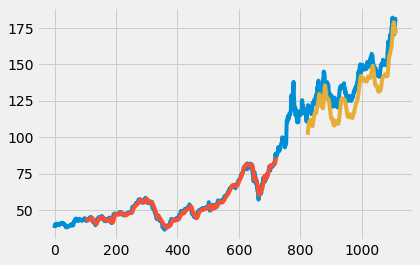

In [22]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [23]:
len(test_data)

390

In [24]:
x_input=test_data[290:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [26]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.96865773]
101
1 day input [0.75696635 0.77295813 0.77563485 0.78764583 0.79100885 0.78442002
 0.76575152 0.76918323 0.78078242 0.7853809  0.7816747  0.77343851
 0.77089908 0.80343172 0.79869594 0.81365815 0.81187369 0.81125601
 0.82930673 0.82779677 0.82141384 0.81708986 0.78922439 0.78682226
 0.77563485 0.77240904 0.77137957 0.74406309 0.74241594 0.7549759
 0.75943719 0.76211391 0.75175019 0.74344541 0.74138636 0.74090598
 0.73088534 0.72601238 0.72621827 0.72560048 0.73980781 0.73953321
 0.7438572  0.73315028 0.72045292 0.73747427 0.74447488 0.75778993
 0.7737817  0.7777625  0.77700752 0.78071372 0.77515437 0.7852436
 0.7776252  0.80123537 0.77906656 0.77741931 0.79025397 0.79299929
 0.79615641 0.79457785 0.79025397 0.78929299 0.78037063 0.77556616
 0.78222368 0.79238161 0.78970488 0.81379544 0.83898417 0.85511324
 0.88723399 0.8604667  0.86280024 0.85120105 0.85628001 0.88599862
 0.91880575 0.87693886 0.88215513 0.9021963  0.92759092 0.95765273
 0.96307478 0.98284146 1.         0

8 day output [[0.9228287]]
9 day input [0.78078242 0.7853809  0.7816747  0.77343851 0.77089908 0.80343172
 0.79869594 0.81365815 0.81187369 0.81125601 0.82930673 0.82779677
 0.82141384 0.81708986 0.78922439 0.78682226 0.77563485 0.77240904
 0.77137957 0.74406309 0.74241594 0.7549759  0.75943719 0.76211391
 0.75175019 0.74344541 0.74138636 0.74090598 0.73088534 0.72601238
 0.72621827 0.72560048 0.73980781 0.73953321 0.7438572  0.73315028
 0.72045292 0.73747427 0.74447488 0.75778993 0.7737817  0.7777625
 0.77700752 0.78071372 0.77515437 0.7852436  0.7776252  0.80123537
 0.77906656 0.77741931 0.79025397 0.79299929 0.79615641 0.79457785
 0.79025397 0.78929299 0.78037063 0.77556616 0.78222368 0.79238161
 0.78970488 0.81379544 0.83898417 0.85511324 0.88723399 0.8604667
 0.86280024 0.85120105 0.85628001 0.88599862 0.91880575 0.87693886
 0.88215513 0.9021963  0.92759092 0.95765273 0.96307478 0.98284146
 1.         0.9698696  0.98194918 0.99320518 0.94056277 0.9207275
 0.93870962 0.95696634 0.9

16 day output [[0.79395086]]
17 day input [0.81187369 0.81125601 0.82930673 0.82779677 0.82141384 0.81708986
 0.78922439 0.78682226 0.77563485 0.77240904 0.77137957 0.74406309
 0.74241594 0.7549759  0.75943719 0.76211391 0.75175019 0.74344541
 0.74138636 0.74090598 0.73088534 0.72601238 0.72621827 0.72560048
 0.73980781 0.73953321 0.7438572  0.73315028 0.72045292 0.73747427
 0.74447488 0.75778993 0.7737817  0.7777625  0.77700752 0.78071372
 0.77515437 0.7852436  0.7776252  0.80123537 0.77906656 0.77741931
 0.79025397 0.79299929 0.79615641 0.79457785 0.79025397 0.78929299
 0.78037063 0.77556616 0.78222368 0.79238161 0.78970488 0.81379544
 0.83898417 0.85511324 0.88723399 0.8604667  0.86280024 0.85120105
 0.85628001 0.88599862 0.91880575 0.87693886 0.88215513 0.9021963
 0.92759092 0.95765273 0.96307478 0.98284146 1.         0.9698696
 0.98194918 0.99320518 0.94056277 0.9207275  0.93870962 0.95696634
 0.96376116 0.98826351 0.99450925 0.98970487 0.98929308 0.96865773
 0.97107673 0.96888387

24 day output [[0.54243314]]
25 day input [0.77563485 0.77240904 0.77137957 0.74406309 0.74241594 0.7549759
 0.75943719 0.76211391 0.75175019 0.74344541 0.74138636 0.74090598
 0.73088534 0.72601238 0.72621827 0.72560048 0.73980781 0.73953321
 0.7438572  0.73315028 0.72045292 0.73747427 0.74447488 0.75778993
 0.7737817  0.7777625  0.77700752 0.78071372 0.77515437 0.7852436
 0.7776252  0.80123537 0.77906656 0.77741931 0.79025397 0.79299929
 0.79615641 0.79457785 0.79025397 0.78929299 0.78037063 0.77556616
 0.78222368 0.79238161 0.78970488 0.81379544 0.83898417 0.85511324
 0.88723399 0.8604667  0.86280024 0.85120105 0.85628001 0.88599862
 0.91880575 0.87693886 0.88215513 0.9021963  0.92759092 0.95765273
 0.96307478 0.98284146 1.         0.9698696  0.98194918 0.99320518
 0.94056277 0.9207275  0.93870962 0.95696634 0.96376116 0.98826351
 0.99450925 0.98970487 0.98929308 0.96865773 0.97107673 0.96888387
 0.96411985 0.95786119 0.95054287 0.94228101 0.93306243 0.92282867
 0.91150588 0.89901298

In [27]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [28]:
scaler.inverse_transform(lst_output)


array([[177.5634364 ],
       [177.91588397],
       [177.596385  ],
       [176.9022672 ],
       [175.99037945],
       [174.9241005 ],
       [173.72034754],
       [172.37720133],
       [170.88614246],
       [169.23641098],
       [167.4161961 ],
       [165.41238438],
       [163.2108463 ],
       [160.79627997],
       [158.15248898],
       [155.26241717],
       [152.10864365],
       [148.67338277],
       [144.93931783],
       [140.88965323],
       [136.5090523 ],
       [131.78421056],
       [126.70479358],
       [121.26456595],
       [115.4625116 ],
       [109.30447513],
       [102.80436895],
       [ 95.98602304],
       [ 88.88456144],
       [ 81.54772663]])

In [29]:
len(df1)

1113

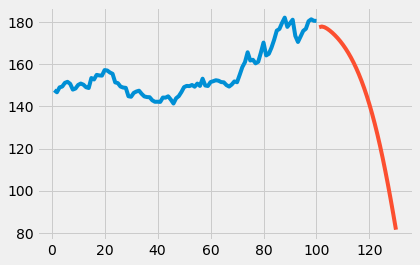

In [30]:
plt.plot(day_new,scaler.inverse_transform(df1[1013:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30daypredict.png')

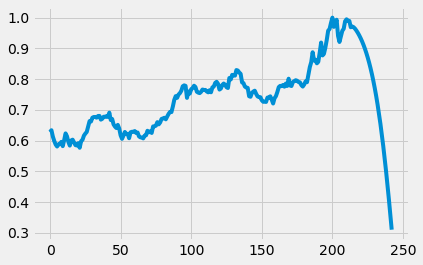

In [31]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [32]:
df3=scaler.inverse_transform(df3).tolist()

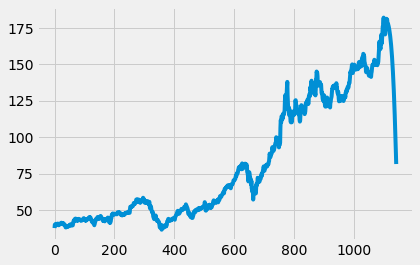

In [33]:
plt.plot(df3)